# Example notebook for Hemlock Ax

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from hemlock import Page, create_test_app
from hemlock.questions import Input, Label
from hemlock_ax import init_test_app, assign_user, make_assigner, run_test
from sqlalchemy_mutable.utils import partial

assigner = make_assigner({"factor0": (0, 1), "factor1": (0, 1)})

def seed():
    assignment = assign_user(assigner)
    return [
        Page(
            Input(
                make_advertisement(**assignment),
                input_tag={"type": "number", "min": 0},
                # by default, the model assumes you're trying to optimize a variable
                # named "target"
                variable="target",
                test_response=partial(make_test_response, **assignment)
            )
        ),
        Page(
            Label("Thank you for your participation!")
        ),
    ]

def make_advertisement(factor0, factor1=0):
    return f"""
        Advertisement {factor0} {factor1}.

        How much would you pay for this product?
    """

def make_test_response(question, factor0, factor1=0):
    return 0.1 * factor0 + 0.2 * factor1 + np.random.normal()


app = create_test_app()
init_test_app(app)

In [2]:
df = run_test(100, seed)[0]
df.head()

/home/dsbowen/hemlock-ax/src/hemlock_ax/assign.py:165: RuntimeWarning: Assignment weights not yet set by the adaptive assigner. Falling back on random assignment.
  warnings.warn(
/home/dsbowen/anaconda3/envs/hemlock-ax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1673: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
Traceback (most recent call last):
  File "/home/dsbowen/hemlock-ax/src/hemlock_ax/assign.py", line 196, in fit_model
    return model(get_data(), **model_kwargs)
  File "/home/dsbowen/hemlock-ax/src/hemlock_ax/models.py", line 42, in linear_regression
    results = model.fit().get_robustcov_results("cluster", groups=df.id)
  File "/home/dsbowen/anaconda3/envs/hemlock-ax/lib/python3.9/site-packages/statsmodels/regression/linear_model.py", line 2551, in get_robustcov_results
    res.cov_params_default = sw.cov_cluster(
  File "/home/dsbowen/anaconda3/envs/hemlock-ax/lib/python3.9/site-packages

n_assigned_users  assignment  pr_best    weight  cum_assigned
0                 9  (0.0, 0.0)    0.015  0.038803             2
1                 9  (0.0, 1.0)    0.228  0.462268             2
2                 9  (1.0, 0.0)    0.004  0.010463             2
3                 9  (1.0, 1.0)    0.753  0.488465             3
4                10  (0.0, 0.0)    0.013  0.039157             2

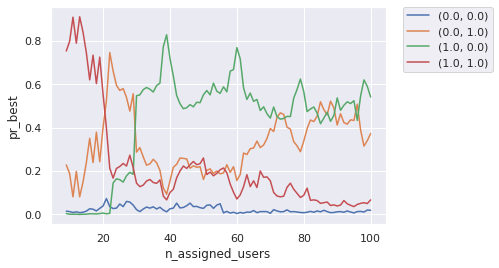

In [3]:
sns.set()
sns.lineplot(data=df, x="n_assigned_users", y="pr_best", hue="assignment")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

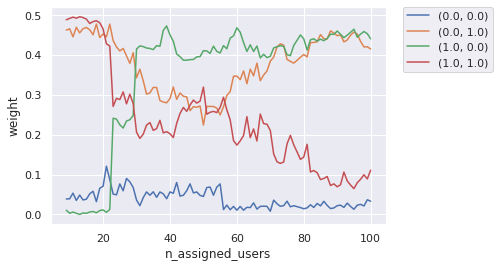

In [4]:
sns.lineplot(data=df, x="n_assigned_users", y="weight", hue="assignment")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

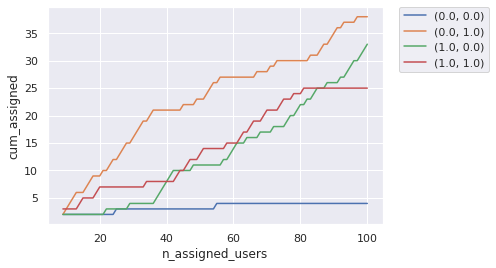

In [5]:
sns.lineplot(data=df, x="n_assigned_users", y="cum_assigned", hue="assignment")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [6]:
def get_cum_assigned(assigner):
    return assigner["get_data"]().drop_duplicates("id").groupby(assigner["keys"])["id"].count()

get_cum_assigned(assigner)

factor0  factor1
0.0      0.0         4
         1.0        38
1.0      0.0        33
         1.0        25
Name: id, dtype: int64